In [1]:
import tweepy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


In [2]:
# Connection to the api
api_key = 'f9QDFkLm0hRjJtlqSZMTTEvxZ'
api_key_secret = 'CiS03yMWCwX7Xhubw3AF8wU79F5bDpdU0VtHsC8K24oWBEt7NT'
access_token = '1223293246681559042-jSkfiFCdGtpHTcFMOS7zqvaOWVYmBm'
access_token_secret = 'ITPw91RpeO6ONMiLuKfE8cOeQnHZOvpDSx2oRoOGHn1QL'

#bearer_token = 'AAAAAAAAAAAAAAAAAAAAANNjCQEAAAAA0tQMCT0VtM7NNbjKb5pY%2BUqnzyU%3D5XXmWifVd9R7LJL08OHXaDzdOZttCxETPAycpbsIMCqmxzwSmU'
            # o de cima ê novo tbm

In [3]:
authenticator = tweepy.OAuthHandler(api_key, api_key_secret) 
authenticator.set_access_token(access_token, access_token_secret) 

api = tweepy.API(authenticator, wait_on_rate_limit=True)

In [4]:
crypto_currency = 'Bitcoin'

search = f'#{crypto_currency} -filter:retweets'

tweet_cursor = tweepy.Cursor(api.search_tweets, q=search, lang='en', tweet_mode='extended').items(100) # api.search_tweets

tweets = [tweet.full_text for tweet in tweet_cursor]

In [5]:
new = []
for tw in api.search_tweets(search, count=200):
    date = tw._json['created_at']
    text = tw._json['text']
    new.append({'date': date, 'text': text})

In [6]:
import pandas as pd
tweetsdf = pd.DataFrame(new)

In [7]:
tweetsdf

,date,text
0,Thu Jun 09 11:12:20 +0000 2022,@econoar N yet it’s just an alt pegged to #bit...
1,Thu Jun 09 11:12:19 +0000 2022,LINK Surges To Four-Week High After Chainlink ...
2,Thu Jun 09 11:12:16 +0000 2022,$BTC \n\nOlayın özeti: 🔨\n\n#Bitcoin #BTC
3,Thu Jun 09 11:12:16 +0000 2022,American Economists Are Baffled by an ‘Unusual...
4,Thu Jun 09 11:12:14 +0000 2022,@toddtronikNFT @radhiplayer1 Actually it is no...
...,...,...
68,Thu Jun 09 11:09:34 +0000 2022,@CNBC Weapons of Mass Destruction\n1. Derivati...
69,Thu Jun 09 11:09:30 +0000 2022,How to NOT invest in Bitcoin: #HODL #Bitcoin h...
70,Thu Jun 09 11:09:30 +0000 2022,#bitcoin 60000$ olması için 2 trilyon $ hacime...
71,Thu Jun 09 11:09:29 +0000 2022,Le Salvador devient le premier pays à reconnaî...


In [8]:
a = tweetsdf['date'][0].split()
a


['Thu', 'Jun', '09', '11:12:20', '+0000', '2022']

In [9]:
a = a[2] + ' ' + a[1] + ' ' + a[5] #+ ' ' + a[3]

In [10]:
a

'09 Jun 2022'

In [11]:
def date_change(a):

    a = tweetsdf['date'][0].split()

    return a[2] + ' ' + a[1] + ' ' + a[5]

In [12]:
tweetsdf

,date,text
0,Thu Jun 09 11:12:20 +0000 2022,@econoar N yet it’s just an alt pegged to #bit...
1,Thu Jun 09 11:12:19 +0000 2022,LINK Surges To Four-Week High After Chainlink ...
2,Thu Jun 09 11:12:16 +0000 2022,$BTC \n\nOlayın özeti: 🔨\n\n#Bitcoin #BTC
3,Thu Jun 09 11:12:16 +0000 2022,American Economists Are Baffled by an ‘Unusual...
4,Thu Jun 09 11:12:14 +0000 2022,@toddtronikNFT @radhiplayer1 Actually it is no...
...,...,...
68,Thu Jun 09 11:09:34 +0000 2022,@CNBC Weapons of Mass Destruction\n1. Derivati...
69,Thu Jun 09 11:09:30 +0000 2022,How to NOT invest in Bitcoin: #HODL #Bitcoin h...
70,Thu Jun 09 11:09:30 +0000 2022,#bitcoin 60000$ olması için 2 trilyon $ hacime...
71,Thu Jun 09 11:09:29 +0000 2022,Le Salvador devient le premier pays à reconnaî...


In [13]:
tweetsdf['date'] = tweetsdf.apply(date_change, axis=1)
tweetsdf

,date,text
0,09 Jun 2022,@econoar N yet it’s just an alt pegged to #bit...
1,09 Jun 2022,LINK Surges To Four-Week High After Chainlink ...
2,09 Jun 2022,$BTC \n\nOlayın özeti: 🔨\n\n#Bitcoin #BTC
3,09 Jun 2022,American Economists Are Baffled by an ‘Unusual...
4,09 Jun 2022,@toddtronikNFT @radhiplayer1 Actually it is no...
...,...,...
68,09 Jun 2022,@CNBC Weapons of Mass Destruction\n1. Derivati...
69,09 Jun 2022,How to NOT invest in Bitcoin: #HODL #Bitcoin h...
70,09 Jun 2022,#bitcoin 60000$ olması için 2 trilyon $ hacime...
71,09 Jun 2022,Le Salvador devient le premier pays à reconnaî...


In [14]:
tweetsdf

,date,text
0,09 Jun 2022,@econoar N yet it’s just an alt pegged to #bit...
1,09 Jun 2022,LINK Surges To Four-Week High After Chainlink ...
2,09 Jun 2022,$BTC \n\nOlayın özeti: 🔨\n\n#Bitcoin #BTC
3,09 Jun 2022,American Economists Are Baffled by an ‘Unusual...
4,09 Jun 2022,@toddtronikNFT @radhiplayer1 Actually it is no...
...,...,...
68,09 Jun 2022,@CNBC Weapons of Mass Destruction\n1. Derivati...
69,09 Jun 2022,How to NOT invest in Bitcoin: #HODL #Bitcoin h...
70,09 Jun 2022,#bitcoin 60000$ olması için 2 trilyon $ hacime...
71,09 Jun 2022,Le Salvador devient le premier pays à reconnaî...


In [15]:
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/brunogama/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brunogama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [17]:
# adding a counter to check the progress of the algo while it runs
global counter
counter = 0
sentence = tweetsdf['text']
def preprocess(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

In [18]:
sentence

0     @econoar N yet it’s just an alt pegged to #bit...
1     LINK Surges To Four-Week High After Chainlink ...
2             $BTC \n\nOlayın özeti: 🔨\n\n#Bitcoin #BTC
3     American Economists Are Baffled by an ‘Unusual...
4     @toddtronikNFT @radhiplayer1 Actually it is no...
                            ...                        
68    @CNBC Weapons of Mass Destruction\n1. Derivati...
69    How to NOT invest in Bitcoin: #HODL #Bitcoin h...
70    #bitcoin 60000$ olması için 2 trilyon $ hacime...
71    Le Salvador devient le premier pays à reconnaî...
72    #hepsiburada \nLive life to the fullest and fo...
Name: text, Length: 73, dtype: object

In [19]:
#get rid of links and hashtags
tweetsdf["text"] = tweetsdf["text"].apply(lambda x : ' '.join([s for s in x.split(' ') if s.find('@') == -1 and s.find('www') == -1 and s.find('https') == -1]))

#get rid of non-ascii characters

tweetsdf = tweetsdf.replace(r'\W+', ' ', regex=True)
tweetsdf

,date,text
0,09 Jun 2022,N yet it s just an alt pegged to bitcoin lol
1,09 Jun 2022,LINK Surges To Four Week High After Chainlink ...
2,09 Jun 2022,BTC Olayın özeti Bitcoin BTC
3,09 Jun 2022,American Economists Are Baffled by an Unusual ...
4,09 Jun 2022,Actually it is not Bitcoiners say 1 Bitcoin 1 ...
...,...,...
68,09 Jun 2022,Weapons of Mass Destruction 1 Derivatives 2 Cr...
69,09 Jun 2022,How to NOT invest in Bitcoin HODL Bitcoin
70,09 Jun 2022,bitcoin 60000 olması için 2 trilyon hacime ih...
71,09 Jun 2022,Le Salvador devient le premier pays à reconnaî...


In [20]:
from nltk.tokenize import word_tokenize

tokenizer = RegexpTokenizer(r'\w+')


In [21]:
def tokenizer_and_remove_pontuation(tweetsdf):
    tokens = word_tokenize(tweetsdf['text'])
    return [token.lower() for token in tokens if token.isalpha()]

tweetsdf['text'] = tweetsdf.apply(tokenizer_and_remove_pontuation, axis=1)

In [22]:
tweetsdf

,date,text
0,09 Jun 2022,"[n, yet, it, s, just, an, alt, pegged, to, bit..."
1,09 Jun 2022,"[link, surges, to, four, week, high, after, ch..."
2,09 Jun 2022,"[btc, olayın, özeti, bitcoin, btc]"
3,09 Jun 2022,"[american, economists, are, baffled, by, an, u..."
4,09 Jun 2022,"[actually, it, is, not, bitcoiners, say, bitco..."
...,...,...
68,09 Jun 2022,"[weapons, of, mass, destruction, derivatives, ..."
69,09 Jun 2022,"[how, to, not, invest, in, bitcoin, hodl, bitc..."
70,09 Jun 2022,"[bitcoin, olması, için, trilyon, hacime, ihtiy..."
71,09 Jun 2022,"[le, salvador, devient, le, premier, pays, à, ..."


In [23]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [24]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")

In [25]:
tweetsdf['text'] = tweetsdf['text'].apply(lambda x : ' '.join(x))

In [26]:

tweetsdf['sentiment'] = tweetsdf['text'].apply(lambda x : nlp(x)._.polarity)
tweetsdf = tweetsdf.sort_values('sentiment').reset_index(drop=True)
tweetsdf

,date,text,sentiment
0,09 Jun 2022,yeah by then the tx fee would be huge and the ...,-0.133333
1,09 Jun 2022,in other words you are greedy and don t unders...,-0.125000
2,09 Jun 2022,the run of the curious towards the basis of ci...,-0.100000
3,09 Jun 2022,mini million mmm went down percent in the last...,-0.077778
4,09 Jun 2022,bitcoin will finish flat possibly up says anal...,-0.012500
...,...,...,...
68,09 Jun 2022,this zesty faucet from is making me tweet this...,0.400000
69,09 Jun 2022,bitcoin is the push to separate money and stat...,0.400000
70,09 Jun 2022,happy married life amp nayanthara best wishes ...,0.683333
71,09 Jun 2022,the discas stage gives clients to take part in...,0.800000


In [27]:
tweetsdf['sentiment'].round(2)

0    -0.13
1    -0.12
2    -0.10
3    -0.08
4    -0.01
      ... 
68    0.40
69    0.40
70    0.68
71    0.80
72    0.80
Name: sentiment, Length: 73, dtype: float64

In [28]:
# Clean as much as possible, but not apply strong editing to the text, yet
sentence = sentence
tokenizer = RegexpTokenizer(r'\w+')

In [29]:
def preprocess(sentence, stemming=False, lemmatizing=False):
  global counter
  counter += 1
  if counter % 100 == 0:
    pass
    #print(counter)

  #clean as much as possible, but not apply strong editing to the text, yet
  sentence=str(sentence)
  tokenizer = RegexpTokenizer(r'\w+')

  sentence = sentence.lower()
  sentence=sentence.replace('{html}',"") 
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', sentence)
  rem_url=re.sub(r'http\S+', '',cleantext)
  rem_num = re.sub('[0-9]+', '', rem_url)
  tokens = tokenizer.tokenize(rem_num)
  
  filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
  
  if stemming == True and lemmatizing == False:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    return " ".join(stem_words)

  if stemming == False and lemmatizing == True:
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(lemma_words)

  if stemming == True and lemmatizing == True:
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(lemma_words)
  
  #at the end of the algo we return filtered words
  return " ".join(filtered_words)

In [30]:
# Preprocess the sentiment text

tweetsdf['text'] = tweetsdf['text'].apply(lambda x: preprocess(x, stemming=False, lemmatizing=True))
tweetsdf

,date,text,sentiment
0,09 Jun 2022,yeah fee would huge bitcoin base layer used govts,-0.133333
1,09 Jun 2022,word greedy understand bitcoin,-0.125000
2,09 Jun 2022,run curious towards basis civilization bitcoin...,-0.100000
3,09 Jun 2022,mini million mmm went percent last minute mmm ...,-0.077778
4,09 Jun 2022,bitcoin finish flat possibly say analyst saylo...,-0.012500
...,...,...,...
68,09 Jun 2022,zesty faucet making tweet claim free lightning...,0.400000
69,09 Jun 2022,bitcoin push separate money state retrospect i...,0.400000
70,09 Jun 2022,happy married life amp nayanthara best wish am...,0.683333
71,09 Jun 2022,discas stage give client take part intelligent...,0.800000


In [31]:
tweetsdf['sentiment'].round(2)
tweetsdf

,date,text,sentiment
0,09 Jun 2022,yeah fee would huge bitcoin base layer used govts,-0.133333
1,09 Jun 2022,word greedy understand bitcoin,-0.125000
2,09 Jun 2022,run curious towards basis civilization bitcoin...,-0.100000
3,09 Jun 2022,mini million mmm went percent last minute mmm ...,-0.077778
4,09 Jun 2022,bitcoin finish flat possibly say analyst saylo...,-0.012500
...,...,...,...
68,09 Jun 2022,zesty faucet making tweet claim free lightning...,0.400000
69,09 Jun 2022,bitcoin push separate money state retrospect i...,0.400000
70,09 Jun 2022,happy married life amp nayanthara best wish am...,0.683333
71,09 Jun 2022,discas stage give client take part intelligent...,0.800000


In [32]:
tweetsdf

,date,text,sentiment
0,09 Jun 2022,yeah fee would huge bitcoin base layer used govts,-0.133333
1,09 Jun 2022,word greedy understand bitcoin,-0.125000
2,09 Jun 2022,run curious towards basis civilization bitcoin...,-0.100000
3,09 Jun 2022,mini million mmm went percent last minute mmm ...,-0.077778
4,09 Jun 2022,bitcoin finish flat possibly say analyst saylo...,-0.012500
...,...,...,...
68,09 Jun 2022,zesty faucet making tweet claim free lightning...,0.400000
69,09 Jun 2022,bitcoin push separate money state retrospect i...,0.400000
70,09 Jun 2022,happy married life amp nayanthara best wish am...,0.683333
71,09 Jun 2022,discas stage give client take part intelligent...,0.800000


In [33]:
df_neg = tweetsdf[tweetsdf['sentiment'] < 0]
df_neu = tweetsdf[tweetsdf['sentiment'] == 0]
df_pos = tweetsdf[tweetsdf['sentiment'] > 0]

In [34]:
df_neg

,date,text,sentiment
0,09 Jun 2022,yeah fee would huge bitcoin base layer used govts,-0.133333
1,09 Jun 2022,word greedy understand bitcoin,-0.125000
2,09 Jun 2022,run curious towards basis civilization bitcoin...,-0.100000
3,09 Jun 2022,mini million mmm went percent last minute mmm ...,-0.077778
4,09 Jun 2022,bitcoin finish flat possibly say analyst saylo...,-0.012500


In [35]:
df_pos

,date,text,sentiment
56,09 Jun 2022,thing scare buying bitcoin right never week mo...,0.067857
57,09 Jun 2022,today deep dive news medium medium neutral bit...,0.113636
58,09 Jun 2022,link surge four week high chainlink reveals up...,0.160000
59,09 Jun 2022,hepsiburada live life fullest focus positive o...,0.181818
60,09 Jun 2022,say bitcoin may grant free,0.200000
61,09 Jun 2022,bitcoin spot trading volume ftx surpassed coin...,0.250000
62,09 Jun 2022,breaking edge wallet launch world first kyc fr...,0.325000
63,09 Jun 2022,gnox token gnox set move higher whilst bitcoin...,0.375000
64,09 Jun 2022,american economist baffled unusual situation r...,0.400000
65,09 Jun 2022,great article fiat insider current banking sys...,0.400000


In [36]:
df_neu

,date,text,sentiment
5,09 Jun 2022,novogratz see danger crypto fund xrp btc bitcoin,0.0
6,09 Jun 2022,metaverse babasından metaverse hamlesi bitcoin...,0.0
7,09 Jun 2022,weapon mass destruction derivative cryptocurre...,0.0
8,09 Jun 2022,salvador devient premier pay reconnaître bitco...,0.0
9,09 Jun 2022,blockchain crypto bitcoin ethereum trading exc...,0.0
10,09 Jun 2022,blockchain crypto bitcoin ethereum trading nrj...,0.0
11,09 Jun 2022,nailing bitcoin,0.0
12,09 Jun 2022,bitcoin respect programmable literal subconsci...,0.0
13,09 Jun 2022,bitcoin last price btc daily indicator rsi bolli,0.0
14,09 Jun 2022,warning strict regulation ahead fed going cryp...,0.0


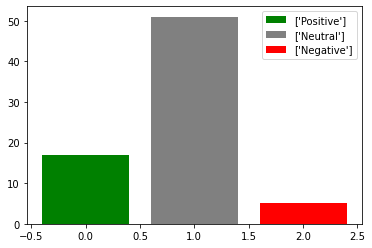

In [37]:
plt.bar([0], [len(df_pos)], label=['Positive'], color=['green'])
plt.bar([1], [len(df_neu)], label=['Neutral'], color=['grey'])
plt.bar([2], [ len(df_neg)], label=['Negative'], color=['red'])
plt.legend()
plt.show() 

In [38]:
print(len(df_neg))
print(len(df_pos))
print(len(df_neu))

5
17
51


In [39]:
import collections
from collections import Counter


In [40]:
positive_words = pd.DataFrame([dict(Counter(' '.join(df_pos['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

negative_words = pd.DataFrame([dict(Counter(' '.join(df_neg['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

neutral_words = pd.DataFrame([dict(Counter(' '.join(df_neu['text'].values.tolist()).split(' ')))]).T.sort_values(0, ascending=False)[0:100].index

In [41]:
positive_words

Index(['bitcoin', 'free', 'amp', 'gnox', 'claim', 'state', 'money', 'separate',
       'life', 'push', 'sat', 'lightning', 'making', 'tweet', 'important',
       'faucet', 'zesty', 'first', 'fiat', 'best', 'world', 'retrospect',
       'unlock', 'medium', 'week', 'positive', 'happy', 'cur', 'platform',
       'performing', 'yet', 'ruble', 'russia', 'situation', 'unusual',
       'article', 'baffled', 'alt', 'economist', 'american', 'eth', 'ethereum',
       'pegged', 'great', 'insider', 'married', 'current', 'nayanthara',
       'wish', 'congrats', 'wikkinayan', 'discas', 'whilst', 'stage', 'give',
       'client', 'take', 'part', 'intelligent', 'system', 'conversation',
       'banking', 'btc', 'thing', 'higher', 'link', 'fullest', 'live',
       'hepsiburada', 'roadmap', 'staking', 'updated', 'reveals', 'chainlink',
       'high', 'four', 'surge', 'topic', 'opensea', 'crypto', 'neutral',
       'news', 'dive', 'deep', 'today', 'average', 'moving', 'never', 'right',
       'buying', '

In [42]:
negative_words

Index(['bitcoin', 'mmm', 'yeah', 'flat', 'went', 'percent', 'last', 'minute',
       'crypto', 'finish', 'possibly', 'mini', 'say', 'analyst', 'saylor',
       'bet', 'btc', 'btcprice', 'million', 'polymath', 'fee', 'word', 'would',
       'huge', 'base', 'layer', 'used', 'govts', 'greedy', 'creates',
       'understand', 'run', 'curious', 'towards', 'basis', 'civilization',
       'tomlee'],
      dtype='object')

In [43]:
# DATAFRAME OF SENTIMENT ANALYSIS OF THE COINS

# initialize list of lists
data = [['Positive', len(positive_words)], ['Neutral', len(neutral_words)], ['Negative', len(negative_words)]]



In [44]:
df = pd.DataFrame(data, columns=['Positive', 'Neutral', 'Negative'])

ValueError: 3 columns passed, passed data had 2 columns

In [45]:
data = {'Name': ['BTC'],
        'Positive': [len(df_pos)],
        'Neutral':[len(df_neu)],
        'Negative': [len(df_neg)] }


In [46]:
data = pd.DataFrame(data)
data

,Name,Positive,Neutral,Negative
0,BTC,17,51,5


In [48]:
data.to_csv('BTC_sentiment_analysis.csv')

In [112]:
##positive_words_df = pd.DataFrame(positive_words)

In [262]:
#negative_words_df = pd.DataFrame(negative_words)

In [263]:
#negative_words_df

In [265]:
#tweets_df['Polarity'] = tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)
#tweets_df['Result'] = tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [266]:
# df['category'].value_counts().plot(kind='bar')


In [268]:
#new_date = []

#for i in tweetsdf['date']:
   # a[5] + ' ' + a[1] + ' ' + a[2] + ' ' + a[3]
   # print(new_date)

In [269]:
## example

#new = []
#for tw in api.search_tweets(search, count=100):
 #   date = tw._json['created_at']
 #   text = tw._json['text']
 #   new.append({'date': date, 'text': text})

In [270]:
user = api.get_user(screen_name = 'cryptofeednews')._json
user['id']

950294018721763328

In [271]:
tweets =api.user_timeline(user_id = 950294018721763328)

In [272]:
for i in tweets:
    print(i._json['text'])

🔥🔥🔥 UNIQUE #NFT COLLECTION! 🔥🔥🔥

Disappearing Billionaires

Mark Zuckerberg (@meta)

Super rare artifact. Artwork b… https://t.co/Na8RC3Eib2
🔥🔥🔥HOTTEST #NFT COLLECTION! 🔥🔥🔥

Disappearing Billionaires

Elon Musk (@elonmusk)

Buy this Digital Masterpiece bef… https://t.co/OLJDvIWgZt
RT @PancakeSwap: ✍️ Unfortunately, the latest IFO proposal has been rejected. We will go back to the drawing board, make some adjustments b…
RT @BNBDtoken: 🚀 Secure your investment and get ready to fly!

Our referral program includes 4 levels of referral rewards. For the friends…
@BNBDriver 🎉 Congratulations!
RT @BNBDriver: 🔥 150 #BNB INVESTED

Thank #BNBDriver Community!
The light of a team’s unity is so powerful that it is able to irradiate the…
RT @binance: #Binance will support the @CeloOrg $CELO network upgrade &amp; hard fork.

Deposits and withdrawals of $CELO will be suspended app…
RT @VextPro: 💰#ApeSwap Pool increases the reward💰

Farm the #BANANA token on the #VEXTpro platform and get increased pass